# Import libraries and dependencies

In [1]:
#IMPORT IMPORT LIBRARY 
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#import seaborn as sns

#Import Libraries
import keras
#from keras import backend as K
from keras.models import Sequential
from tensorflow.keras import layers

from keras.layers import Activation
from keras.layers.core import Dense
#from keras.optimizers import Adam
from keras.metrics import mean_squared_error
from keras.optimizers import RMSprop


import datetime


/home/rakib/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/rakib/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/rakib/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/rakib/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: Futu

In [2]:
 #Import necessary modules

import matplotlib.pyplot as plt
import sklearn


Load Datasets

In [3]:
#Read the Students data

dataset = pd.read_csv('data/students_data.csv') 
dataset.tail()

,CTM_Average,CTM_Bad,CTM_Good,CA_Average,CA_Bad,CA_Good,AS_No,AS_Yes,LP_Average,LP_Bad,...,FcS_Yes,PI_No,PI_Yes,RWF_Average,RWF_Bad,RWF_Good,JTF_No,JTF_Yes,LS,FYR
152,1,0,0,1,0,0,0,1,1,0,...,0,1,0,1,0,0,1,0,2.4,2.34
153,1,0,0,1,0,0,0,1,1,0,...,0,1,0,1,0,0,1,0,2.5,3.10
154,1,0,0,1,0,0,0,1,1,0,...,0,1,0,1,0,0,1,0,2.5,2.12
155,1,0,0,1,0,0,0,1,1,0,...,0,1,0,1,0,0,1,0,2.3,2.71
156,0,0,1,0,0,1,0,1,0,0,...,1,1,0,1,0,0,1,0,3.1,2.34


In [4]:
#dataset = pd.get_dummies(dataset, prefix='', prefix_sep='')
#dataset.tail()

# Split the dataset

In [5]:
train_dataset = dataset.sample(frac=0.90,random_state=0)
test_dataset = dataset.drop(train_dataset.index)

In [6]:
#sns.pairplot(train_dataset[['CTM_Average','CTM_Bad','CTM_Good','CA_Average','CA_Bad','CA_Good','AS_No','AS_Yes','LP_Average','LP_Bad','LP_Good','FES_No','FES_Yes','R_In Dhaka City','R_Outside Dhaka City','SH','SM','ECA_No','ECA_Yes','DA_No','DA_Yes','RS_NO','RS_No','RS_Yes','RS_yes','FS_No','FS_Yes','FcS_No','FcS_Yes','PI_No','PI_Yes','RWF_Average','RWF_Bad','RWF_Good','JTF_No','JTF_Yes','JTF_no','JTF_yes','LS','FYR']], diag_kind="kde")

In [7]:
train_stats = train_dataset.describe()
train_stats.pop("FYR")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
CTM_Average,141.0,0.347518,0.477879,0.00,0.0,0.00,1.00,1.00
CTM_Bad,141.0,0.212766,0.410723,0.00,0.0,0.00,0.00,1.00
CTM_Good,141.0,0.439716,0.498122,0.00,0.0,0.00,1.00,1.00
CA_Average,141.0,0.255319,0.437595,0.00,0.0,0.00,1.00,1.00
CA_Bad,141.0,0.141844,0.350134,0.00,0.0,0.00,0.00,1.00
CA_Good,141.0,0.602837,0.491055,0.00,0.0,1.00,1.00,1.00
AS_No,141.0,0.177305,0.383288,0.00,0.0,0.00,0.00,1.00
AS_Yes,141.0,0.822695,0.383288,0.00,1.0,1.00,1.00,1.00
LP_Average,141.0,0.290780,0.455741,0.00,0.0,0.00,1.00,1.00
LP_Bad,141.0,0.113475,0.318304,0.00,0.0,0.00,0.00,1.00


# Split features from labels

In [8]:
train_labels = train_dataset.pop('FYR')
test_labels = test_dataset.pop('FYR')

# Build The Model

In [9]:
model = Sequential()
model.add(Dense(32, input_shape=[len(train_dataset.keys())], activation= "relu"))
model.add(Dense(64, activation= "relu"))
model.add(Dense(64, activation= "relu"))
model.add(Dense(16, activation= "relu"))
model.add(Dense(1))

In [10]:
#tf.keras.optimizers.RMSprop(0.001)

model.compile(RMSprop(lr=.001),loss= "mean_squared_error" , metrics=["mean_absolute_error","mean_squared_error"])

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                1152      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_4 (Dense)              (None, 16)                1040      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 8,481
Trainable params: 8,481
Non-trainable params: 0
_________________________________________________________________


In [12]:
example_batch = train_dataset[:17]
example_result = model.predict(example_batch)
example_result

array([[-0.48984775],
       [-0.26631075],
       [-0.0478856 ],
       [-0.27857816],
       [-0.10840955],
       [ 0.07672203],
       [ 0.06327516],
       [-0.07658905],
       [ 0.14458632],
       [ 0.05372471],
       [ 0.03735173],
       [-0.02339797],
       [ 0.13965459],
       [-0.36282796],
       [ 0.05027995],
       [-0.03274935],
       [-0.01389033]], dtype=float32)

# Train Model

In [13]:
log_dir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [14]:
history=model.fit(train_dataset, train_labels,
          epochs=500,
          batch_size=10,
          shuffle=True, 
          verbose=0,
          validation_data=(train_dataset, train_labels),
          callbacks=[tensorboard_callback])

In [15]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,val_loss,val_mean_absolute_error,val_mean_squared_error,loss,mean_absolute_error,mean_squared_error,epoch
495,0.010264,0.060613,0.010264,0.023274,0.101500,0.023274,495
496,0.020399,0.100947,0.020399,0.014976,0.077498,0.014976,496
497,0.014938,0.078203,0.014938,0.016999,0.092011,0.016999,497
498,0.012021,0.067028,0.012021,0.017002,0.090260,0.017002,498
499,0.008700,0.048601,0.008700,0.018438,0.094858,0.018438,499


# Save Model

In [16]:
#Save as PKL format(Not recomended)

from sklearn.externals import joblib
joblib.dump(model,'new_predict_final.pkl')
print("Saved model to disk as PKL")

Saved model to disk as PKL


/home/rakib/.local/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [17]:
model.save_weights("new_predict_final.h5")
print("Saved model to disk as hdf5")

Saved model to disk as hdf5


# Prediction

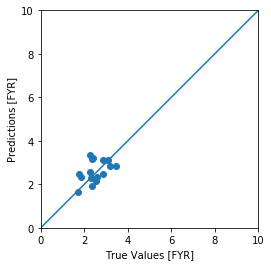

In [18]:
test_predictions = model.predict(test_dataset).flatten()
a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [FYR]')
plt.ylabel('Predictions [FYR]')
lims = [0, 10]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)


Prediction the test set values

In [43]:
test_predictions = model.predict(test_dataset).flatten()
 
test_val=(test_labels, test_predictions)
print(test_val)

(9      3.11
21     1.77
36     2.55
39     2.85
47     2.32
58     2.26
67     2.34
70     2.57
81     3.16
87     2.88
88     3.46
103    1.69
117    2.38
140    2.25
147    2.34
149    1.84
Name: FYR, dtype: float64, array([3.1311061, 2.462249 , 2.1467702, 3.128503 , 2.3083751, 2.555315 ,
       3.1699307, 2.3254602, 2.8511283, 2.4769616, 2.863312 , 1.6242831,
       3.2102926, 3.3319223, 1.9193702, 2.315997 ], dtype=float32))


Prediction with your own values

In [41]:
#sample=np.array[Good,Good,Yes,Good,Yes,In Dhaka City,Yes,No,No,No,Yes,No,Average,No,2,23.1,3.21]
#my_Valuess = np.array([0,1,0,1,0,0,1,0,1,0,0,0,1,1,0,2,8,1,0,1,0,0,1,0,1,0,1,1,0,1,0,0,0,1,2.69]) #2.71


new_Values=np.array([0,0,1,0,0,1,0,1,0,0,1,0,1,1,0,4.5,5.5,0,1,1,0,1,0,0,1,0,1,1,0,0,0,1,0,1,3.73]).reshape(1,-1)
print("Predicted results : ",model.predict(new_Values))

Predicted results :  [[2.8493094]]
